# **Title:** "Parkinsons Detection using Classical ML Models and NN"
#Author : Anoop Reddy
# Date: 21-03-2024

# **Using AdaBoost and Multi-Layer Perceptron collectively to classify Parkinson's disease**

1    147
0     48
Name: status, dtype: int64


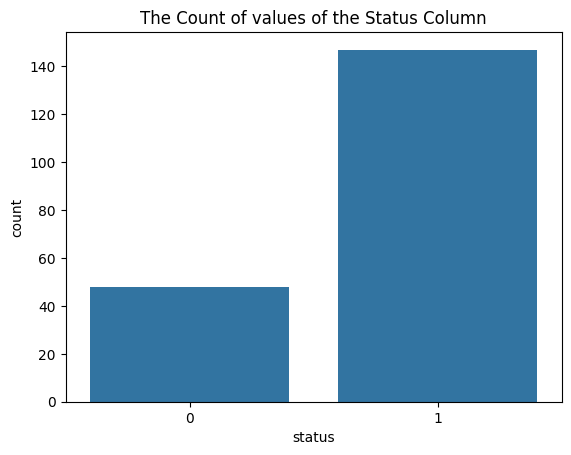

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (398) reached and the optimization hasn't converged yet.
  warnings.warn(


In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv("parkinsons.csv")

# Display dataset information and statistics
# print(df.info())
# print(df.describe())

print(df.status.value_counts())

sns.countplot(x='status', data=df)
plt.title('The Count of values of the Status Column')
plt.show()
labels = df["status"]
features = df.drop(["name", "status"], axis=1)
scaler = MinMaxScaler((-1, 1))

X = scaler.fit_transform(features)
y = labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=398, random_state=42)
mlp_clf.fit(X_train, y_train)

mlp_predictions_train = mlp_clf.predict(X_train)
mlp_predictions_test = mlp_clf.predict(X_test)

# **Only MLP**

In [79]:
test_accuracy_MLP=accuracy_score(y_test,mlp_predictions_test)
# train_accuracy_MLP=accuracy_score(y_train,mlp_predictions_train)
# train_accuracy_MLP=train_accuracy_MLP*100
test_accuracy_MLP= test_accuracy_MLP*100
# print("Train Accuracy of MLP alone : ", train_accuracy_MLP)
print("Test Accuracy of MLP alone : ", test_accuracy_MLP)


Test Accuracy of MLP alone :  96.5909090909091


# **MLP max_iterations vs Accuracy plot**

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

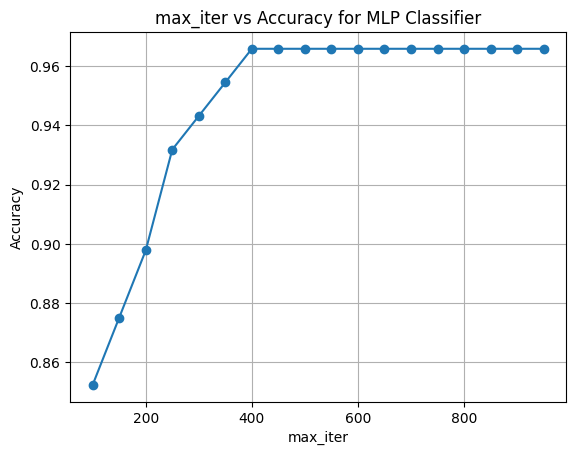

In [80]:
max_iters = range(100, 1000, 50)
accuracies = []
for max_iter in max_iters:
    mlp_clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=max_iter, random_state=42)
    mlp_clf.fit(X_train, y_train)
    y_pred = mlp_clf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))


plt.plot(max_iters, accuracies, marker='o')
plt.title('max_iter vs Accuracy for MLP Classifier')
plt.xlabel('max_iter')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# **MLP + Adaboost**

In [81]:
adaboost_clf = AdaBoostClassifier(n_estimators=80, random_state=42)
adaboost_clf.fit(mlp_predictions_train.reshape(-1, 1), y_train)
ensemble_predictions_test = adaboost_clf.predict(mlp_predictions_test.reshape(-1, 1))
test_accuracy = accuracy_score(y_test, ensemble_predictions_test)
print("Test Accuracy:", test_accuracy*100)

Test Accuracy: 96.5909090909091


# **AdaBoost + MLP n_estimators vs Accuracy plot**

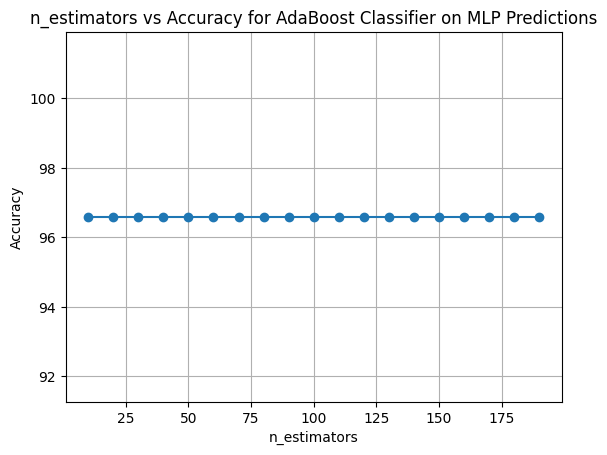

In [100]:
n_estimators_values = range(10, 200, 10)
accuracies = []
for n_estimators in n_estimators_values:
    adaboost_clf = AdaBoostClassifier(n_estimators=n_estimators, random_state=42)
    adaboost_clf.fit(mlp_predictions_train.reshape(-1,1), y_train)
    ensemble_predictions_test = adaboost_clf.predict(mlp_predictions_test.reshape(-1,1))
    accuracies.append(accuracy_score(y_test, ensemble_predictions_test))

for i in range(len(accuracies)):
  accuracies[i]=accuracies[i]*100

plt.plot(n_estimators_values, accuracies, marker='o')
plt.title('n_estimators vs Accuracy for AdaBoost Classifier on MLP Predictions')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# **Support Vector Machines (SVM)**

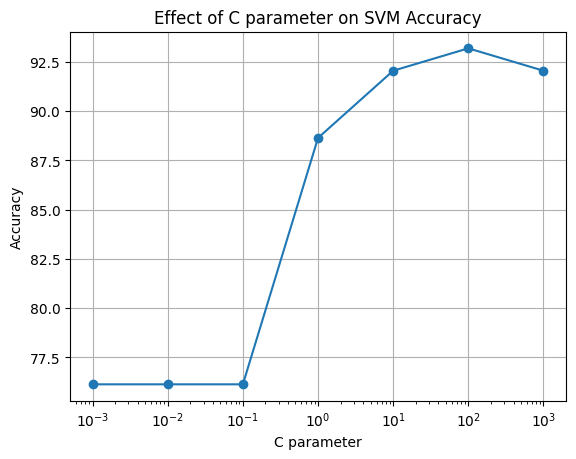

In [98]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

accuracies = []

for C in C_values:
    svm_clf = SVC(kernel='rbf', C=C, probability=True, random_state=42)

    svm_clf.fit(X_train, y_train)

    svm_predictions_test = svm_clf.predict(X_test)

    accuracy = accuracy_score(y_test, svm_predictions_test)
    accuracy=accuracy*100
    accuracies.append(accuracy)

plt.plot(C_values, accuracies, marker='o')
plt.title('Effect of C parameter on SVM Accuracy')
plt.xlabel('C parameter')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.grid(True)
plt.show()



# **K - Nearest Neighbours**

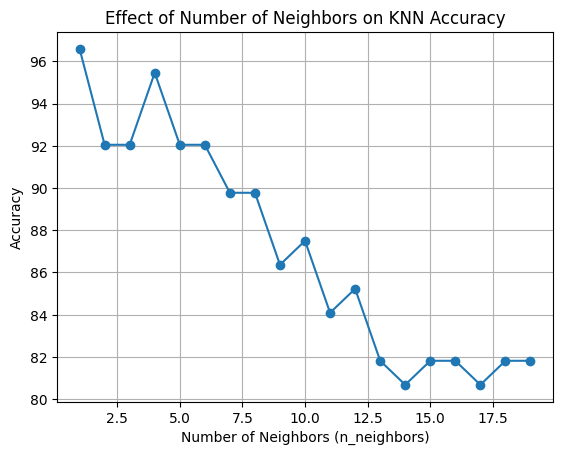

In [108]:
n_neighbors_values = range(1, 20)

accuracies = []

for n_neighbors in n_neighbors_values:
    knn_clf = KNeighborsClassifier(n_neighbors=n_neighbors)

    knn_clf.fit(X_train, y_train)

    knn_predictions_test = knn_clf.predict(X_test)

    accuracy = accuracy_score(y_test, knn_predictions_test)
    accuracies.append(accuracy)
for i in range(len(accuracies)):
  accuracies[i]=accuracies[i]*100

plt.plot(n_neighbors_values, accuracies, marker='o')
plt.title('Effect of Number of Neighbors on KNN Accuracy')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
